In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src/")
from utilities.data_overviewer import data_characterization
from utilities.feature_engineering import  extract_date_features

In [2]:
# train = spark.read.csv("../data/fraudTrain.csv") 
# test = spark.read.csv("../data/fraudTest.csv") 

# train_df = train.toPandas()
# test_df = test.toPandas()

In [18]:
train_df = pd.read_csv("../data/fraudTrain.csv")
data_characterization(train_df)

,Columns_name,Type,Nb_unique_values,Nb_Nan_values,%_Nan_values,Unique_values(value:count),mean,std,min,25%,50%,75%,max
0,Unnamed: 0,int64,1296675,0,0.0,0:1 403054:1 458357:1 456308:1 446067:1 444018:1,648337.0,374317.974488,0.0,324168.5,648337.0,972505.5,1296674.0
1,trans_date_trans_time,object,1274791,0,0.0,2019-04-22 16:02:01:4 2020-06-01 01:37:47:4 20...,-,-,-,-,-,-,-
2,cc_num,int64,983,0,0.0,571365235126:3123 4512828414983801773:3123 367...,417192042079726656.0,1308806447000240384.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
3,merchant,object,693,0,0.0,fraud_Kilback LLC:4403 fraud_Cormier LLC:3649 ...,-,-,-,-,-,-,-
4,category,object,14,0,0.0,gas_transport:131659 grocery_pos:123638 home:1...,-,-,-,-,-,-,-
5,amt,float64,52928,0,0.0,1.14:542 1.04:538 1.25:535 1.02:533 1.01:523 1...,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9
6,first,object,352,0,0.0,Christopher:26669 Robert:21667 Jessica:20581 J...,-,-,-,-,-,-,-
7,last,object,481,0,0.0,Smith:28794 Williams:23605 Davis:21910 Johnson...,-,-,-,-,-,-,-
8,gender,object,2,0,0.0,F:709863 M:586812,-,-,-,-,-,-,-
9,street,object,983,0,0.0,0069 Robin Brooks Apt. 695:3123 864 Reynolds P...,-,-,-,-,-,-,-


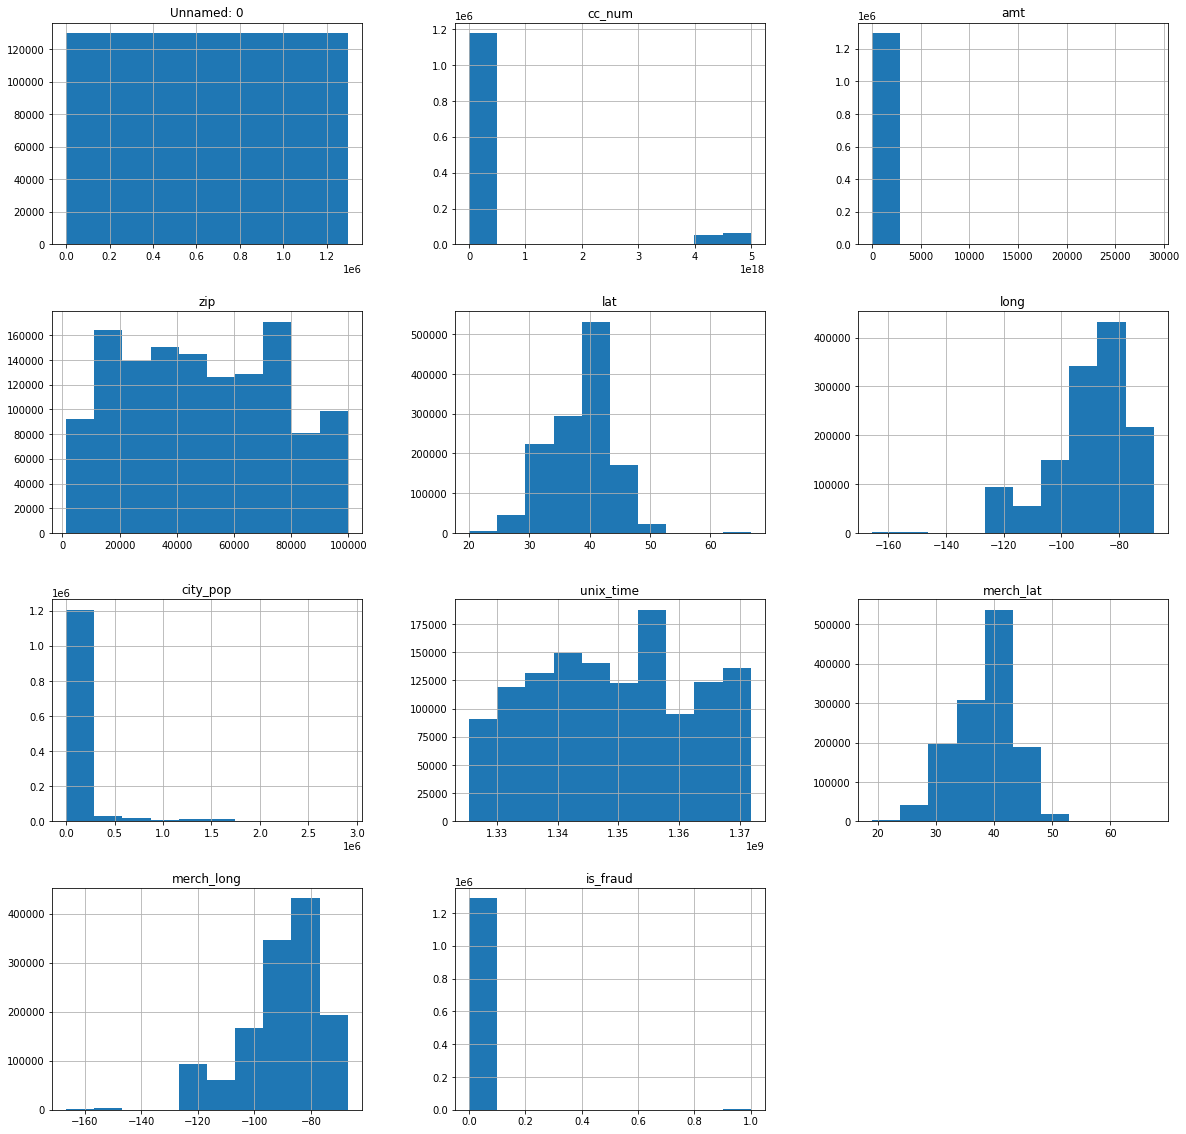

In [ ]:
train_df.hist(figsize=(20,20));

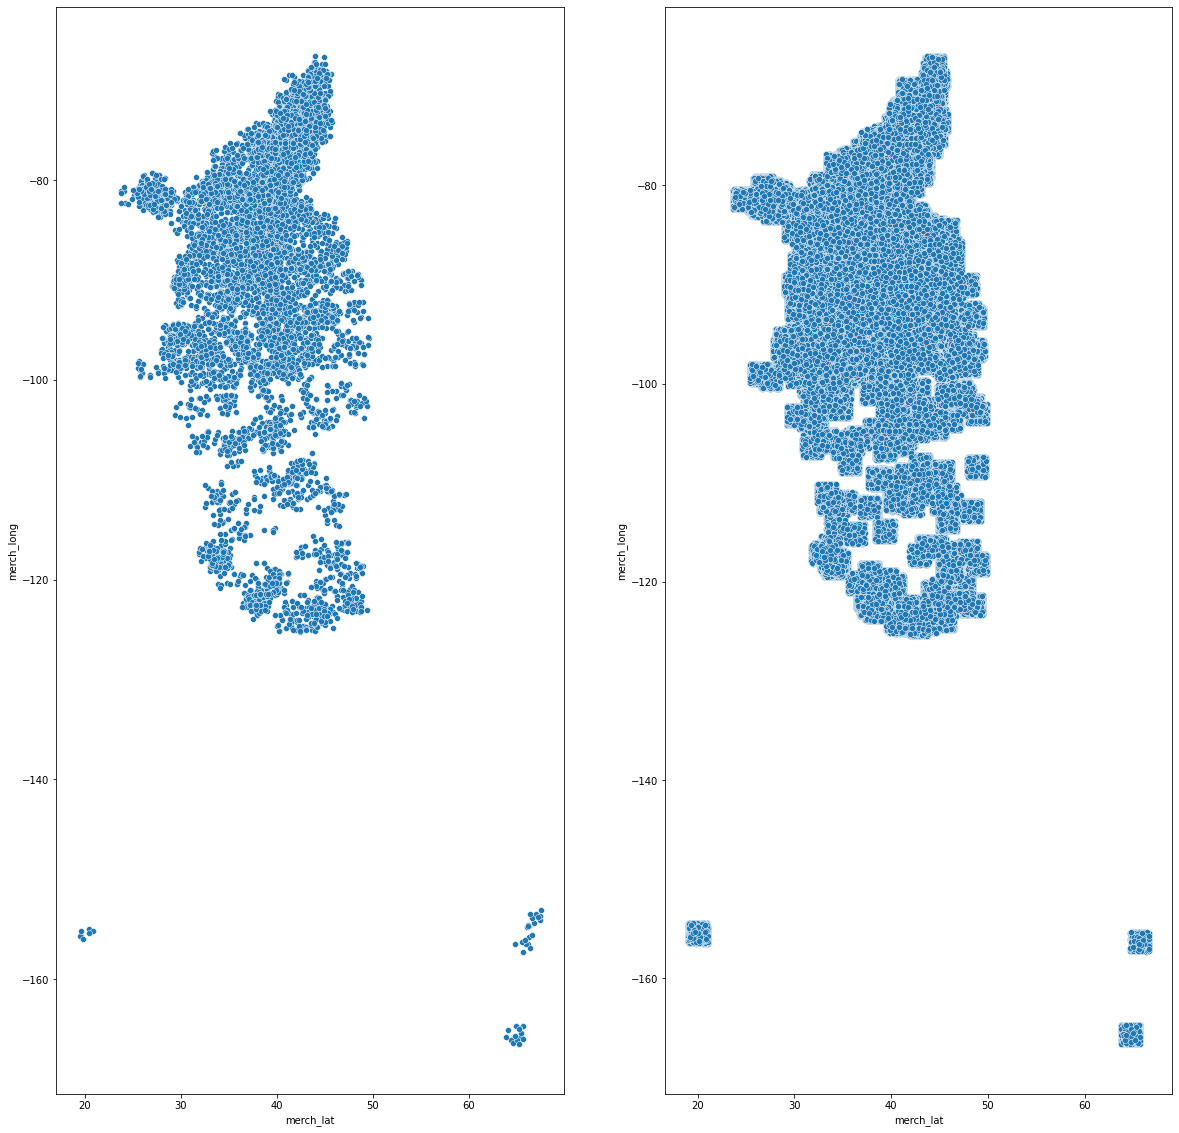

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
sns.scatterplot(x='merch_lat', y="merch_long", data=train_df[train_df.is_fraud==1], ax=ax[0]);
sns.scatterplot(x='merch_lat', y="merch_long", data=train_df[train_df.is_fraud==0], ax=ax[1]);

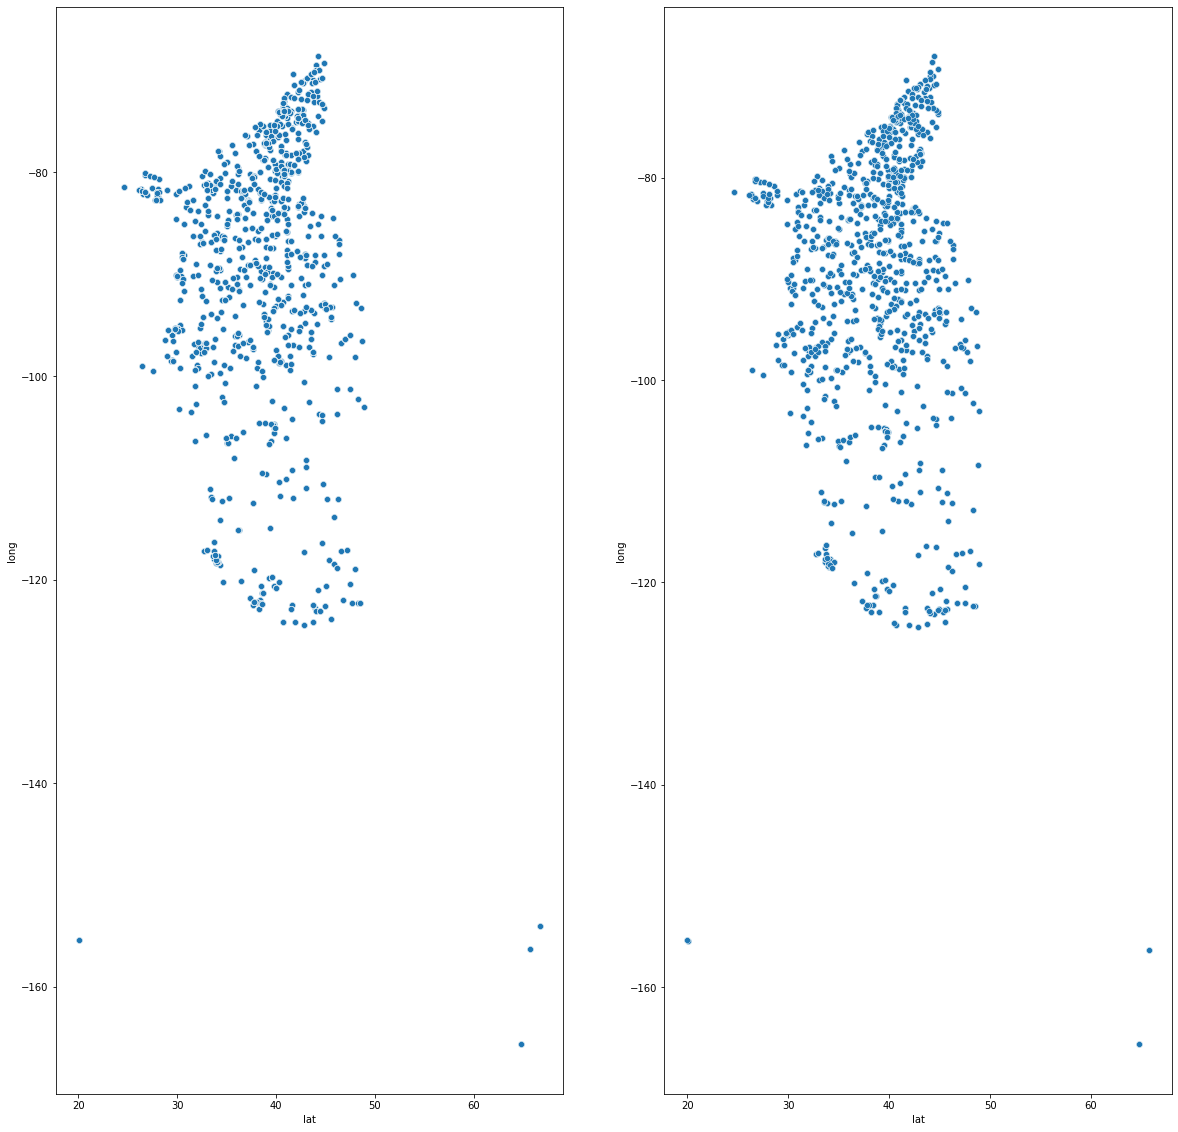

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
sns.scatterplot(x='lat', y="long", data=train_df[train_df.is_fraud==1], ax=ax[0]);
sns.scatterplot(x='lat', y="long", data=train_df[train_df.is_fraud==0], ax=ax[1]);

In [25]:
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"], format="%Y-%m-%d %H:%M:%S")

train_df = extract_date_features(train_df, "trans_date_trans_time")

../src\utilities\feature_engineering.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week"] = df[date_col].dt.week


<AxesSubplot:xlabel='hour', ylabel='count'>

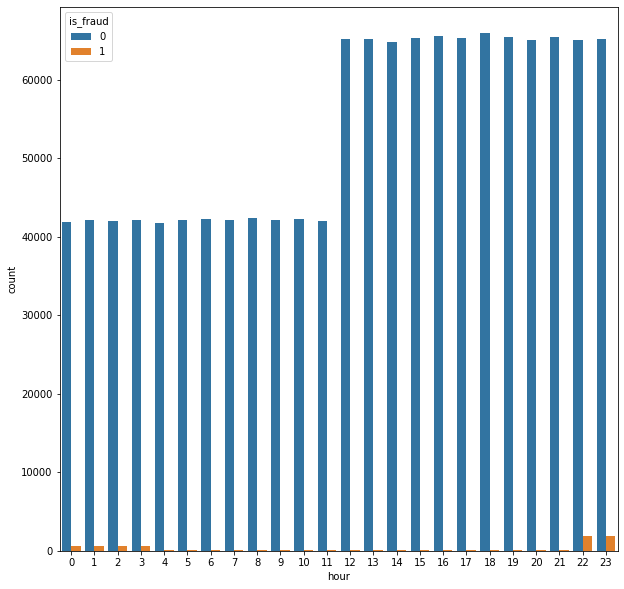

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.countplot(x='hour', data=train_df, hue="is_fraud", ax=ax)

Text(0.5, 1.0, 'Distribution of amout for fraudulent transactions')

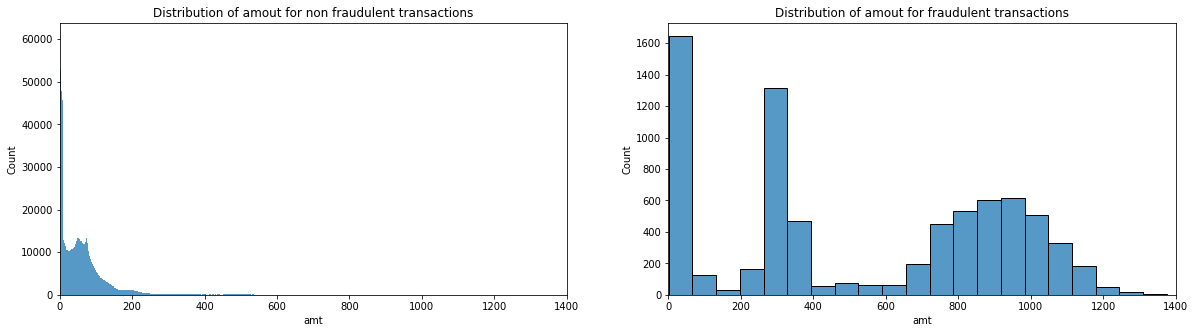

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,5), sharex=True)
sns.histplot(data=train_df[train_df.is_fraud==0], x="amt", ax=ax[0]).set_title('Distribution of amout for non fraudulent transactions');
plt.xlim(0, 1400);
sns.histplot(data=train_df[train_df.is_fraud==1], x="amt", ax=ax[1]).set_title('Distribution of amout for fraudulent transactions');


In [22]:
train_df["year_month"] = train_df.apply(lambda row: str(row.year)+'_'+str(row.month), axis=1)

<AxesSubplot:xlabel='year_month', ylabel='count'>

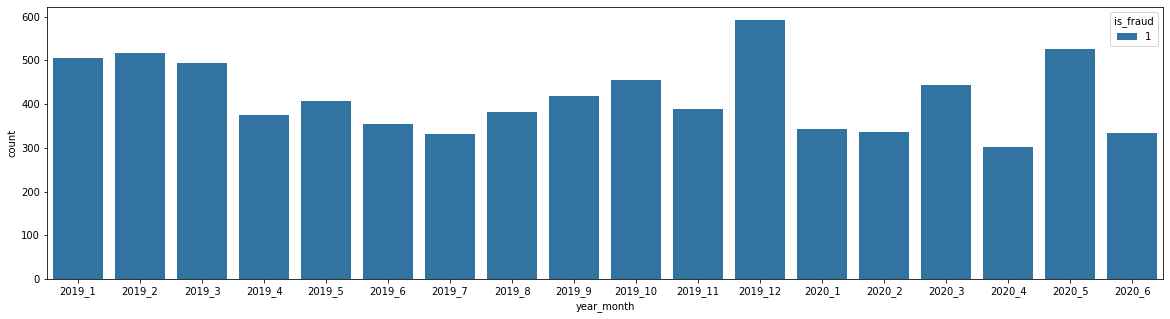

In [37]:
fig, ax = plt.subplots(1, figsize=(20,5))
sns.countplot(x='year_month', hue="is_fraud", data=train_df[train_df.is_fraud==1], ax=ax)

<AxesSubplot:xlabel='category', ylabel='count'>

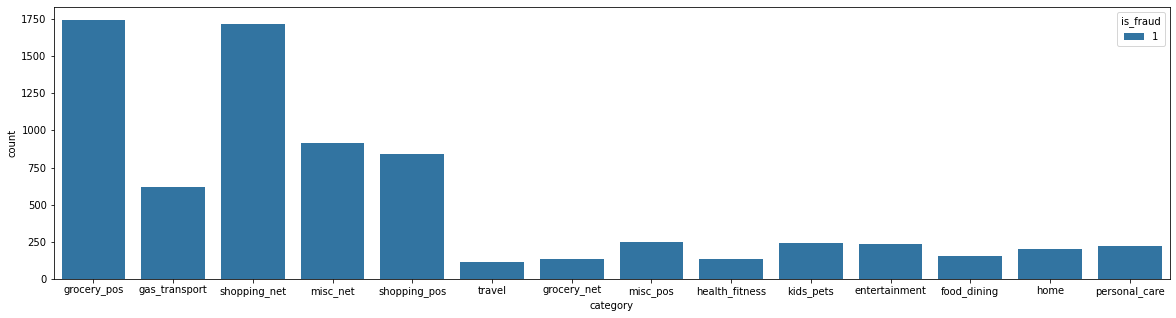

In [45]:
fig, ax = plt.subplots(1, figsize=(20,5))
sns.countplot(x='category', hue="is_fraud", data=train_df[train_df.is_fraud==1], ax=ax)

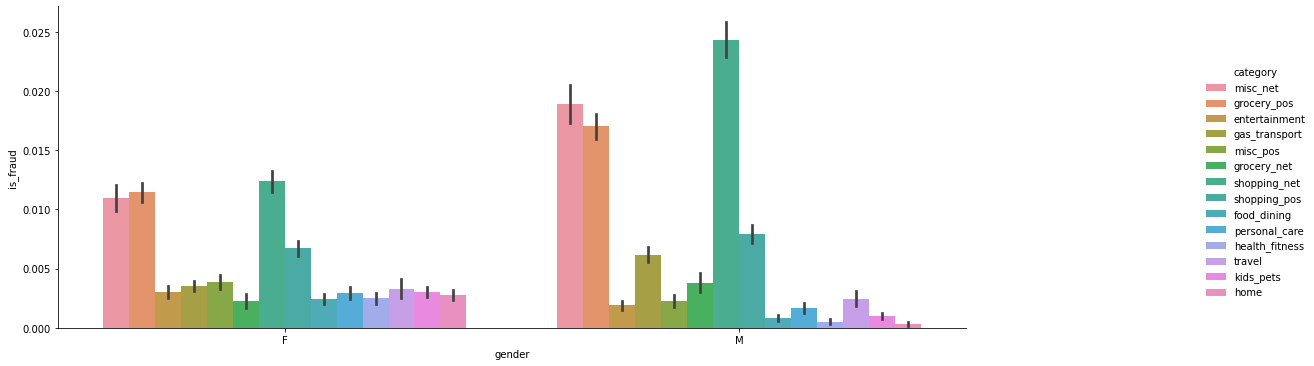

In [59]:
# fig, ax = plt.subplots(1, figsize=(20,5))
g = sns.catplot(x='gender', y='is_fraud', hue="category", data=train_df, kind="bar");
g.fig.set_size_inches(20,5)


In [40]:
train_df.merchant = train_df.apply(lambda x: x["merchant"].split("_")[1], axis=1)

In [21]:
fraud = train_df[train_df.is_fraud==1]

fraud[fraud.cc_num==60416207185]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
102490,102490,2019-03-01 01:32:53,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,14b8331a59459499ea6fc0015aea4ae4,1330565573,43.432352,-108.982476,1
102556,102556,2019-03-01 02:42:25,60416207185,fraud_Cummings LLC,gas_transport,11.74,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,ba2ebc05cdb94af457dc23f588413d25,1330569745,42.656763,-109.868240,1
104145,104145,2019-03-01 23:06:58,60416207185,fraud_Labadie LLC,personal_care,19.16,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,e59cab77e36f552efdb0daa91b8e6683,1330643218,42.084862,-109.537321,1
106627,106627,2019-03-02 22:10:38,60416207185,fraud_Barrows PLC,shopping_pos,830.06,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,3becc6c1b0902b23cc621512b5709568,1330726238,42.739276,-107.975363,1
106628,106628,2019-03-02 22:10:59,60416207185,"fraud_Windler, Goodwin and Kovacek",home,261.79,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,a2549382981f0b230d3e7dde8d58a699,1330726259,42.204230,-109.341230,1
106735,106735,2019-03-02 23:01:54,60416207185,fraud_Douglas-White,entertainment,594.09,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,e29fe2c9dee909dc9013fbdaa8684e7b,1330729314,42.468523,-109.687147,1
106751,106751,2019-03-02 23:08:08,60416207185,"fraud_Turner, Ziemann and Lehner",food_dining,130.08,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,38b0924485d5eb7978ed2f2b04a1dc72,1330729688,42.869714,-108.879962,1
106760,106760,2019-03-02 23:11:08,60416207185,fraud_Parker-Kunde,personal_care,20.41,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,293c908b5276ad02a86756e30f494a62,1330729868,42.132393,-109.694820,1
106835,106835,2019-03-02 23:43:40,60416207185,fraud_Berge-Hills,kids_pets,19.23,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,2285e041091c98cf8d78dc8710814732,1330731820,42.995377,-109.128294,1


In [6]:
train_v0 = pd.read_csv("../data/train_V0_processed.csv")

<AxesSubplot:>

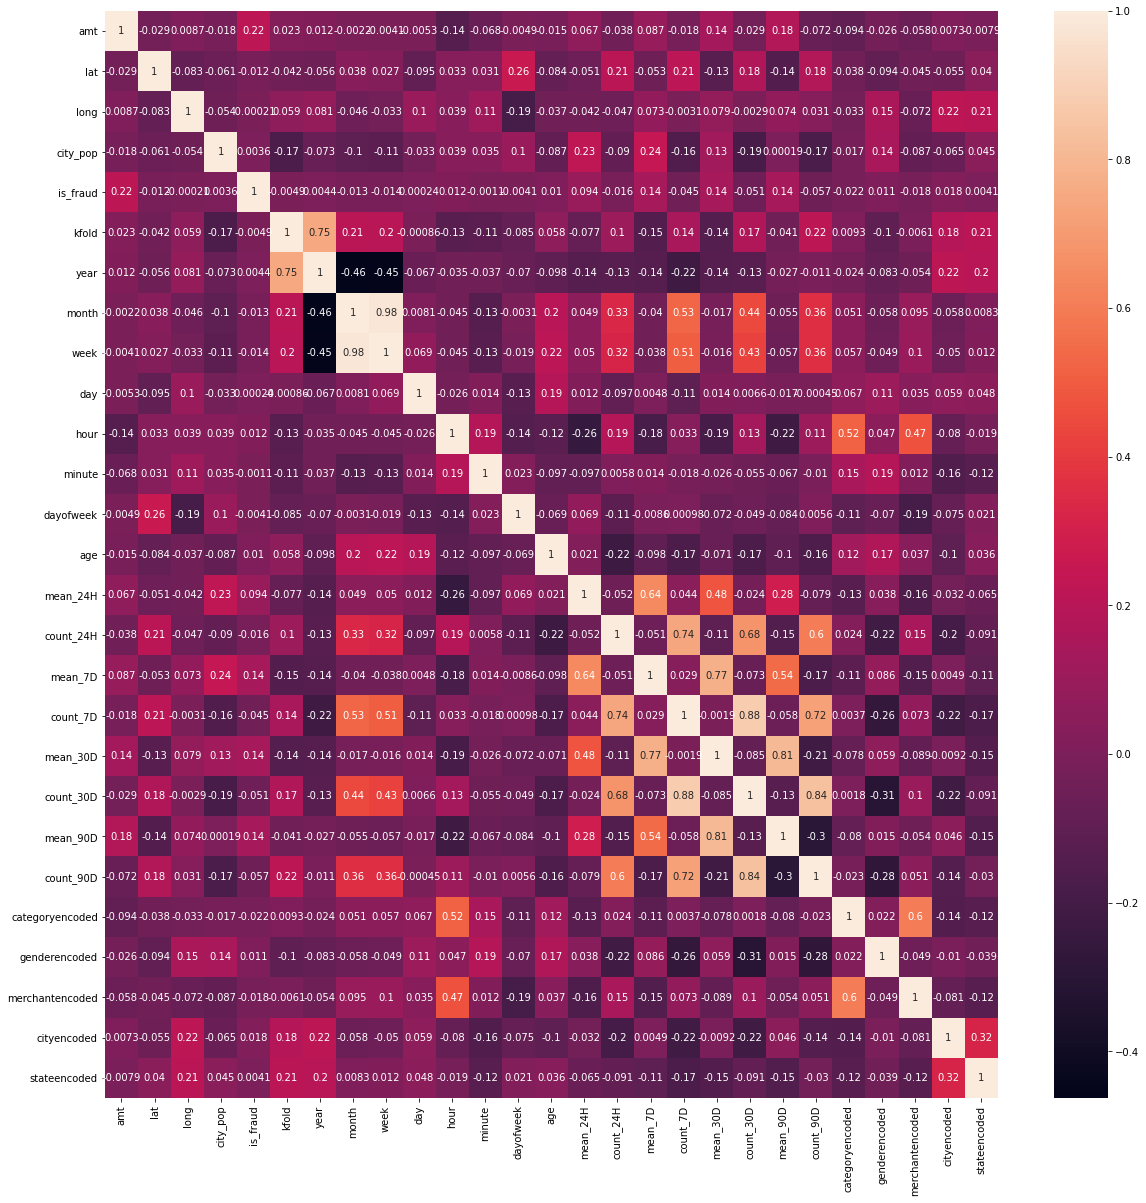

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_v0.corr(), annot=True, ax=ax)
